In [586]:
# !pip show matplotlib
# upgrading matplotlib to 3.5.3 for better plots
# !pip install matplotlib --upgrade
# plot.bar_label(hplot.containers[0]) <- this works only with 3.4 version of matplotlib

Loading the Dataset

In [587]:
# load the dataset
import pandas as pd;
loan = pd.read_csv("loan.csv");
# check the total entries, missing data in columns, datatypes
# 39717 rows, 111 columns
loan.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Data Cleaning

In [588]:
loan['int_rate'].unique()

array(['10.65%', '15.27%', '15.96%', '13.49%', '12.69%', '7.90%',
       '18.64%', '21.28%', '14.65%', '9.91%', '16.29%', '6.03%', '11.71%',
       '12.42%', '14.27%', '16.77%', '7.51%', '8.90%', '18.25%', '6.62%',
       '19.91%', '17.27%', '17.58%', '21.67%', '19.42%', '22.06%',
       '20.89%', '20.30%', '23.91%', '19.03%', '23.52%', '23.13%',
       '22.74%', '22.35%', '24.11%', '6.00%', '22.11%', '7.49%', '11.99%',
       '5.99%', '10.99%', '9.99%', '18.79%', '11.49%', '8.49%', '15.99%',
       '16.49%', '6.99%', '12.99%', '15.23%', '14.79%', '5.42%', '10.59%',
       '17.49%', '15.62%', '21.36%', '19.29%', '13.99%', '18.39%',
       '16.89%', '17.99%', '20.62%', '20.99%', '22.85%', '19.69%',
       '20.25%', '23.22%', '21.74%', '22.48%', '23.59%', '12.62%',
       '18.07%', '11.63%', '7.91%', '7.42%', '11.14%', '20.20%', '12.12%',
       '19.39%', '16.11%', '17.54%', '22.64%', '13.84%', '16.59%',
       '17.19%', '12.87%', '20.69%', '9.67%', '21.82%', '19.79%',
       '18.49%', '

In [589]:
# check for duplicate rows based on id
any_duplicates=loan.duplicated(['id']).any()
print(any_duplicates)
# no duplicate records found

False


In [590]:
# remove empty columns
loan = loan.dropna(axis = 1, how = 'all')
loan.info(verbose=True, show_counts=True)
# sorted(loan.columns)
# Columns reduced from 111 to 57

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [591]:
#drop all the rows with only nan values
loan = loan.dropna(axis = 0, how = 'all')
loan.info()
# no of rows remains 39717

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [592]:
## drop rows where the loan_status='Current'
# indexAge = loan[(loan['loan_status']=='Current') ].index
# loan.drop(indexAge , inplace=True)
## drop rows where loan_status is nan
# loan=loan[loan['loan_status'].notna()]
# print(loan.shape)
## no of rows reduced 38577
## set loan_status -> Fully Paid to 1;;
## set loan_status -> Charged Off to 0;;
# loan['loan_status'].replace({'Fully Paid': 1, 'Charged Off': 0},inplace=True)
# loan['loan_status'].unique()

In [593]:
#drop columns that have high percentage of nan
print(loan.shape)
# keep columns where null percentage is less than 60%
loan = loan.loc[:, loan.isnull().mean() < .6]
# three columns with high percentage of nulls dropped
print(loan.shape)

(39717, 57)
(39717, 54)


In [594]:
# drop rows that have high percentage of nan
perc = 60.0 
# calculates minimun number of columns without null value to reach 60%
min_count =  int(((100-perc)/100)*loan.shape[1] + 1)
#atleast 22 columns should be non na
print(min_count)
loan = loan.dropna( axis=0, 
                    thresh=min_count)
loan.shape
# no rows to drop , remains 39717

22


(39717, 54)

In [595]:
#drop columns that are not relevant to business problem.
columns_list = ["desc","member_id","url","emp_title","zip_code","tax_liens","policy_code","initial_list_status","installment"]
loan.drop(labels = columns_list, axis =1, inplace=True)
#columns reduced to 45
print(loan.shape)
loan.info()

(39717, 45)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 0 to 39716
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   loan_amnt                   39717 non-null  int64  
 2   funded_amnt                 39717 non-null  int64  
 3   funded_amnt_inv             39717 non-null  float64
 4   term                        39717 non-null  object 
 5   int_rate                    39717 non-null  object 
 6   grade                       39717 non-null  object 
 7   sub_grade                   39717 non-null  object 
 8   emp_length                  38642 non-null  object 
 9   home_ownership              39717 non-null  object 
 10  annual_inc                  39717 non-null  float64
 11  verification_status         39717 non-null  object 
 12  issue_d                     39717 non-null  object 
 13  loan_status        

Data Manipulation/Imputation

In [596]:
# data cleaning
# check every column
# fix nulls
# derive columns from timestamps
# impute data where required
# columns emp_length has nulls -> impute
print('Before Cleaning')
print(loan['emp_length'].unique())
# extract only the numerical year.
loan['emp_length']=loan['emp_length'].str.extract('(\d+)')
loan['emp_length'].fillna('0',inplace=True)
print('After Cleaning')
print(loan['emp_length'].unique())


Before Cleaning
['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]
After Cleaning
['10' '1' '3' '8' '9' '4' '5' '6' '2' '7' '0']


In [597]:
# column title has 11 nulls -> impute
print('Before Cleaning')
print(loan['title'].isnull().sum())
loan['title'].fillna('Not Known',inplace=True)
print('After Cleaning')
print(loan['title'].isnull().sum())

Before Cleaning
11
After Cleaning
0


In [598]:
# column revol_util has null -> impute
# revol_util -> Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
print('Before Cleaning')
print(loan['revol_util'].isnull().sum())
print(loan['revol_util'].unique())
# extract only the numbers
# loan['revol_util'].str.extract('(\d+.\d+)')
# or remove the '%'
loan['revol_util']=loan['revol_util'].str.rstrip('%')
print('After Cleaning')
print(loan['revol_util'].unique())
# not imputing nulls with 0, mean, median, mode as they will be unrepresentative

Before Cleaning
50
['83.70%' '9.40%' '98.50%' ... '49.63%' '0.04%' '7.28%']
After Cleaning
['83.70' '9.40' '98.50' ... '49.63' '0.04' '7.28']


In [599]:
# column last_pymnt_d has nulls -> impute
print('Before Cleaning')
print(loan['last_pymnt_d'].isnull().sum())
print(loan['last_pymnt_d'].head(5))
# creating derived columns
# it is a date column with mon-yy format
# split these into two columns
# last_pymnt_d_mon & last_pymnt_d_year
loan['last_pymnt_d']=pd.to_datetime(loan['last_pymnt_d'], format='%b-%y')
loan['last_pymnt_d_year']=loan['last_pymnt_d'].dt.year
loan['last_pymnt_d_mon']=loan['last_pymnt_d'].dt.month
# not imputing nulls.
print('After Cleaning')
print(loan['last_pymnt_d'].isnull().sum())
print(loan['last_pymnt_d'].head(5))
print(loan['last_pymnt_d_year'].head(5))
print(loan['last_pymnt_d_mon'].head(5))
loan.shape
# added two columns

Before Cleaning
71
0    Jan-15
1    Apr-13
2    Jun-14
3    Jan-15
4    May-16
Name: last_pymnt_d, dtype: object
After Cleaning
71
0   2015-01-01
1   2013-04-01
2   2014-06-01
3   2015-01-01
4   2016-05-01
Name: last_pymnt_d, dtype: datetime64[ns]
0    2015.0
1    2013.0
2    2014.0
3    2015.0
4    2016.0
Name: last_pymnt_d_year, dtype: float64
0    1.0
1    4.0
2    6.0
3    1.0
4    5.0
Name: last_pymnt_d_mon, dtype: float64


(39717, 47)

In [600]:
# column last_credit_pull_d  has nulls -> impute
print('Before Cleaning')
print(loan['last_credit_pull_d'].isnull().sum())
print(loan['last_credit_pull_d'].head(5))
# creating derived columns
# it is a date column with mon-yy format
# split these into two columns
# last_credit_pull_d_mon & last_credit_pull_d_year
loan['last_credit_pull_d']=pd.to_datetime(loan['last_credit_pull_d'], format='%b-%y')
loan['last_credit_pull_d_year']=loan['last_credit_pull_d'].dt.year
loan['last_credit_pull_d_mon']=loan['last_credit_pull_d'].dt.month
# not imputing nulls.
print('After Cleaning')
print(loan['last_credit_pull_d'].isnull().sum())
print(loan['last_credit_pull_d'].head(5))
print(loan['last_credit_pull_d_year'].head(5))
print(loan['last_credit_pull_d_mon'].head(5))
loan.shape
# added two columns

Before Cleaning
2
0    May-16
1    Sep-13
2    May-16
3    Apr-16
4    May-16
Name: last_credit_pull_d, dtype: object
After Cleaning
2
0   2016-05-01
1   2013-09-01
2   2016-05-01
3   2016-04-01
4   2016-05-01
Name: last_credit_pull_d, dtype: datetime64[ns]
0    2016.0
1    2013.0
2    2016.0
3    2016.0
4    2016.0
Name: last_credit_pull_d_year, dtype: float64
0    5.0
1    9.0
2    5.0
3    4.0
4    5.0
Name: last_credit_pull_d_mon, dtype: float64


(39717, 49)

In [601]:
# column collections_12_mths_ex_med has nulls -> impute
print('Before Cleaning')
print(loan['collections_12_mths_ex_med'].isnull().sum())
print(loan['collections_12_mths_ex_med'].unique())
# has only 0 and nan , safe to impute nan with 0
loan['collections_12_mths_ex_med'].fillna(0,inplace=True)
print('After Cleaning')
print(loan['collections_12_mths_ex_med'].unique())
print(loan['collections_12_mths_ex_med'].isnull().sum())

Before Cleaning
56
[ 0. nan]
After Cleaning
[0.]
0


In [602]:
# column chargeoff_within_12_mths has nulls -> impute
print('Before Cleaning')
print(loan['chargeoff_within_12_mths'].isnull().sum())
print(loan['chargeoff_within_12_mths'].unique())
# has only 0 and nan , safe to impute nan with 0
loan['chargeoff_within_12_mths'].fillna(0,inplace=True)
print('After Cleaning')
print(loan['chargeoff_within_12_mths'].unique())
print(loan['chargeoff_within_12_mths'].isnull().sum())

Before Cleaning
56
[ 0. nan]
After Cleaning
[0.]
0


In [603]:
# column pub_rec_bankruptcies has nulls -> impute
# pub_rec_bankruptcies -> Number of public record bankruptcies
print('Before Cleaning')
print(loan['pub_rec_bankruptcies'].isnull().sum())
print(loan['pub_rec_bankruptcies'].unique())
loan['pub_rec_bankruptcies'].fillna('Not Known',inplace=True)
print('After Cleaning')
print(loan['pub_rec_bankruptcies'].unique())
print(loan['pub_rec_bankruptcies'].isnull().sum())

Before Cleaning
697
[ 0.  1.  2. nan]
After Cleaning
[0.0 1.0 2.0 'Not Known']
0


In [604]:
# column issue_d can be used to derive two more columns
print('Before extraction')
print(loan['issue_d'].head(10))
# creating derived columns
# it is a date column with mon-yy format
# split these into two columns
# issue_d_mon & issue_d_year
loan['issue_d']=pd.to_datetime(loan['issue_d'], format='%b-%y')
loan['issue_d_year']=loan['issue_d'].dt.year
loan['issue_d_mon']=loan['issue_d'].dt.month
# not imputing nulls.
print('After extraction')
print(loan['issue_d'].head(10))
print(loan['issue_d_year'].head(10))
print(loan['issue_d_mon'].head(10))
loan.shape
# added two columns

Before extraction
0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
4    Dec-11
5    Dec-11
6    Dec-11
7    Dec-11
8    Dec-11
9    Dec-11
Name: issue_d, dtype: object
After extraction
0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
4   2011-12-01
5   2011-12-01
6   2011-12-01
7   2011-12-01
8   2011-12-01
9   2011-12-01
Name: issue_d, dtype: datetime64[ns]
0    2011
1    2011
2    2011
3    2011
4    2011
5    2011
6    2011
7    2011
8    2011
9    2011
Name: issue_d_year, dtype: int64
0    12
1    12
2    12
3    12
4    12
5    12
6    12
7    12
8    12
9    12
Name: issue_d_mon, dtype: int64


(39717, 51)

In [605]:
# column earliest_cr_line is mm-yy format
print('Before extraction')
print(loan['earliest_cr_line'].head(5))
# creating derived columns
# it is a date column with mon-yy format
# split these into two columns
# earliest_cr_line_mon & earliest_cr_line_year
loan['earliest_cr_line']=pd.to_datetime(loan['earliest_cr_line'], format='%b-%y')
loan['earliest_cr_line_year']=loan['earliest_cr_line'].dt.year
loan['earliest_cr_line_mon']=loan['earliest_cr_line'].dt.month
# not imputing nulls.
print('After extraction')
print(loan['earliest_cr_line'].head(10))
print(loan['earliest_cr_line_year'].head(10))
print(loan['earliest_cr_line_mon'].head(10))
loan.shape

Before extraction
0    Jan-85
1    Apr-99
2    Nov-01
3    Feb-96
4    Jan-96
Name: earliest_cr_line, dtype: object
After extraction
0   1985-01-01
1   1999-04-01
2   2001-11-01
3   1996-02-01
4   1996-01-01
5   2004-11-01
6   2005-07-01
7   2007-01-01
8   2004-04-01
9   2004-09-01
Name: earliest_cr_line, dtype: datetime64[ns]
0    1985
1    1999
2    2001
3    1996
4    1996
5    2004
6    2005
7    2007
8    2004
9    2004
Name: earliest_cr_line_year, dtype: int64
0     1
1     4
2    11
3     2
4     1
5    11
6     7
7     1
8     4
9     9
Name: earliest_cr_line_mon, dtype: int64


(39717, 53)

In [606]:
# column int_rate has %, it can be removed
print('Before Cleaning')
print(loan['int_rate'].head(5))
loan['int_rate'] = loan['int_rate'].str.rstrip('%')
print('After Cleaning')
print(loan['int_rate'].head(5))

Before Cleaning
0    10.65%
1    15.27%
2    15.96%
3    13.49%
4    12.69%
Name: int_rate, dtype: object
After Cleaning
0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: int_rate, dtype: object


In [607]:
# column term can be cleaned for analysis
print('Before Cleaning')
print(loan['term'].unique())
loan['term'] = loan['term'].str.extract('(\d+)')
print('After Cleaning')
print(loan['term'].unique())

Before Cleaning
[' 36 months' ' 60 months']
After Cleaning
['36' '60']


Converting Datatypes of Columns

In [608]:
# checking column types to check if some columns can be converted to numeric/float help with analysis
print('Before Conversion, check dtypes')
# loan.info()
# check these columns and convert to int if possible
# term, int_rate, emp_length, revolv_util
print(loan['term'].head(5))
print(loan['int_rate'].head(5))
print(loan['emp_length'].head(5))
print(loan['revol_util'].head(5))

columns = ['term','int_rate','emp_length','revol_util']
loan[columns] = loan[columns].apply(pd.to_numeric)
print('After Conversion, check dtypes')
print(loan['term'].head(5))
print(loan['int_rate'].head(5))
print(loan['emp_length'].head(5))
print(loan['revol_util'].head(5))

Before Conversion, check dtypes
0    36
1    60
2    36
3    36
4    60
Name: term, dtype: object
0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: int_rate, dtype: object
0    10
1     1
2    10
3    10
4     1
Name: emp_length, dtype: object
0    83.70
1     9.40
2    98.50
3       21
4    53.90
Name: revol_util, dtype: object
After Conversion, check dtypes
0    36
1    60
2    36
3    36
4    60
Name: term, dtype: int64
0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: int_rate, dtype: float64
0    10
1     1
2    10
3    10
4     1
Name: emp_length, dtype: int64
0    83.7
1     9.4
2    98.5
3    21.0
4    53.9
Name: revol_util, dtype: float64


Check out of the box metrics in a dataframe

In [609]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          39717 non-null  int64         
 1   loan_amnt                   39717 non-null  int64         
 2   funded_amnt                 39717 non-null  int64         
 3   funded_amnt_inv             39717 non-null  float64       
 4   term                        39717 non-null  int64         
 5   int_rate                    39717 non-null  float64       
 6   grade                       39717 non-null  object        
 7   sub_grade                   39717 non-null  object        
 8   emp_length                  39717 non-null  int64         
 9   home_ownership              39717 non-null  object        
 10  annual_inc                  39717 non-null  float64       
 11  verification_status         39717 non-null  object    

In [610]:
# decribe the stats of continous variables 
loan.describe()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,emp_length,annual_inc,dti,delinq_2yrs,...,chargeoff_within_12_mths,delinq_amnt,last_pymnt_d_year,last_pymnt_d_mon,last_credit_pull_d_year,last_credit_pull_d_mon,issue_d_year,issue_d_mon,earliest_cr_line_year,earliest_cr_line_mon
count,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,...,39717.0,39717.0,39646.000000,39646.000000,39715.000000,39715.000000,39717.000000,39717.000000,39717.000000,39717.000000
mean,6.831319e+05,11219.443815,10947.713196,10397.448868,42.418007,12.021177,4.954226,6.896893e+04,13.315130,0.146512,...,0.0,0.0,2012.820966,6.444206,2014.285006,5.818305,2010.328902,7.172168,1996.787597,6.890525
std,2.106941e+05,7456.670694,7187.238670,7128.450439,10.622815,3.724825,3.461960,6.379377e+04,6.678594,0.491812,...,0.0,0.0,1.539878,3.429377,1.791542,3.027076,0.877514,3.396910,7.405085,3.540473
min,5.473400e+04,500.000000,500.000000,0.000000,36.000000,5.420000,0.000000,4.000000e+03,0.000000,0.000000,...,0.0,0.0,2008.000000,1.000000,2007.000000,1.000000,2007.000000,1.000000,1969.000000,1.000000
25%,5.162210e+05,5500.000000,5400.000000,5000.000000,36.000000,9.250000,2.000000,4.040400e+04,8.170000,0.000000,...,0.0,0.0,2012.000000,3.000000,2013.000000,4.000000,2010.000000,4.000000,1993.000000,4.000000
50%,6.656650e+05,10000.000000,9600.000000,8975.000000,36.000000,11.860000,4.000000,5.900000e+04,13.400000,0.000000,...,0.0,0.0,2013.000000,6.000000,2015.000000,5.000000,2011.000000,7.000000,1998.000000,7.000000
75%,8.377550e+05,15000.000000,15000.000000,14400.000000,60.000000,14.590000,9.000000,8.230000e+04,18.600000,0.000000,...,0.0,0.0,2014.000000,9.000000,2016.000000,8.000000,2011.000000,10.000000,2001.000000,10.000000
max,1.077501e+06,35000.000000,35000.000000,35000.000000,60.000000,24.590000,10.000000,6.000000e+06,29.990000,11.000000,...,0.0,0.0,2016.000000,12.000000,2016.000000,12.000000,2011.000000,12.000000,2068.000000,12.000000


In [611]:
# Find the correlation
loan.corr()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,emp_length,annual_inc,dti,delinq_2yrs,...,chargeoff_within_12_mths,delinq_amnt,last_pymnt_d_year,last_pymnt_d_mon,last_credit_pull_d_year,last_credit_pull_d_mon,issue_d_year,issue_d_mon,earliest_cr_line_year,earliest_cr_line_mon
id,1.000000,0.141919,0.152286,0.249547,0.218589,0.078831,0.094812,0.008731,0.095983,-0.008644,...,NaN,NaN,0.560666,0.088050,0.304620,0.025599,0.846269,0.401693,0.052031,-0.019573
loan_amnt,0.141919,1.000000,0.981578,0.940034,0.361036,0.309415,0.161924,0.271149,0.066439,-0.031864,...,NaN,NaN,0.139676,-0.016440,0.077850,-0.023242,0.123414,0.066677,-0.169158,-0.013991
funded_amnt,0.152286,0.981578,1.000000,0.958422,0.340510,0.312619,0.161475,0.266965,0.066283,-0.032355,...,NaN,NaN,0.140300,-0.019348,0.079683,-0.024944,0.133885,0.057436,-0.162581,-0.013625
funded_amnt_inv,0.249547,0.940034,0.958422,1.000000,0.360747,0.306657,0.169808,0.254375,0.074689,-0.038501,...,NaN,NaN,0.232698,-0.012581,0.127608,-0.022231,0.261641,0.083791,-0.147885,-0.013333
term,0.218589,0.361036,0.340510,0.360747,1.000000,0.451699,0.110473,0.046675,0.082426,0.006350,...,NaN,NaN,0.387845,-0.039979,0.178486,-0.033738,0.263308,0.059423,-0.041268,-0.016297
int_rate,0.078831,0.309415,0.312619,0.306657,0.451699,1.000000,0.017516,0.053185,0.111162,0.157916,...,NaN,NaN,0.102446,-0.018538,0.081297,-0.021273,0.056428,0.039791,0.104156,-0.007778
emp_length,0.094812,0.161924,0.161475,0.169808,0.110473,0.017516,1.000000,0.122239,0.051017,0.015740,...,NaN,NaN,0.090480,0.006995,0.076344,-0.011208,0.098289,0.024549,-0.230717,-0.039370
annual_inc,0.008731,0.271149,0.266965,0.254375,0.046675,0.053185,0.122239,1.000000,-0.122732,0.023083,...,NaN,NaN,0.013285,-0.007638,0.008851,-0.016566,0.010706,0.010812,-0.162363,-0.008780
dti,0.095983,0.066439,0.066283,0.074689,0.082426,0.111162,0.051017,-0.122732,1.000000,-0.034452,...,NaN,NaN,0.103194,0.008108,0.118763,-0.015629,0.095500,0.018463,-0.035633,0.007284
delinq_2yrs,-0.008644,-0.031864,-0.032355,-0.038501,0.006350,0.157916,0.015740,0.023083,-0.034452,1.000000,...,NaN,NaN,-0.008231,0.000165,-0.004185,-0.004139,-0.003319,-0.011768,-0.064428,-0.000448


**Univariate Analysis**

In [612]:
# Univariate analysis
import seaborn as sns #wrapper on matplotlib
import matplotlib.pyplot as plt
# sns.set(rc={'figure.figsize':(15,8),'facecolor':'lightblue'})
sns.set_style("dark")
columns_list_remove = set(())

Univariate Analysis of Application Type - Categorical Variable

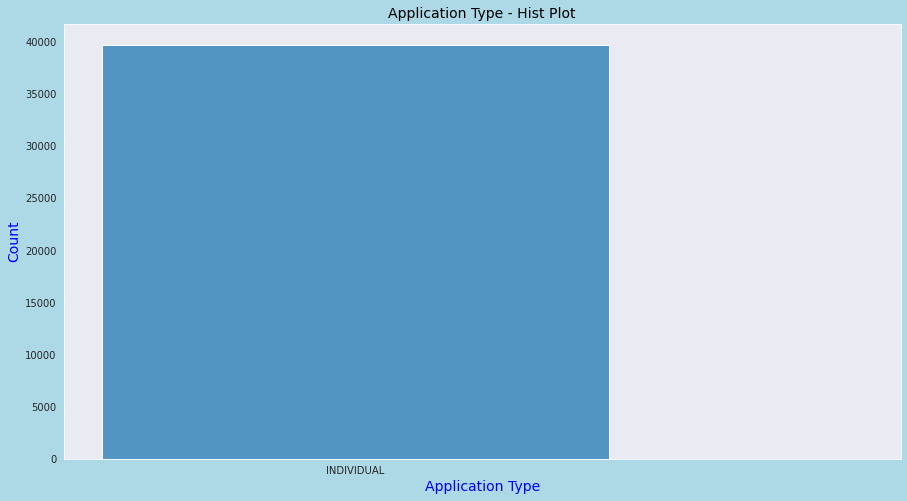

In [613]:
plt.figure(figsize=(15,8),facecolor='lightblue')
hplot = sns.histplot(loan['application_type'])
hplot.set_title('Application Type - Hist Plot',fontsize=14,color='black')
hplot.set_xlabel('Application Type',fontsize=14,color='b')
hplot.set_ylabel('Count',fontsize=14,color='b')
# has only Individual -> add to list of columns to be removed
columns_list_remove.add('application_type')

# Inference: 
# - all the applications are individual applications.

Univariate Analysis of Payment Plan - Categorical Variable

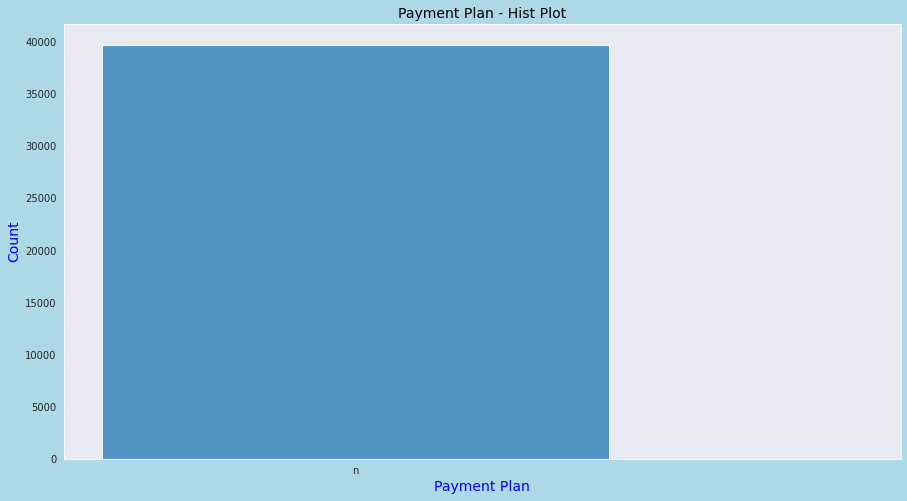

In [614]:
plt.figure(figsize=(15,8),facecolor='lightblue')
hplot = sns.histplot(loan['pymnt_plan'])
hplot.set_title('Payment Plan - Hist Plot',fontsize=14,color='black')
hplot.set_xlabel('Payment Plan',fontsize=14,color='b')
hplot.set_ylabel('Count',fontsize=14,color='b')
# has only n -> add to list of columns to be removed
columns_list_remove.add('pymnt_plan')

# Inference: 
# - all the applications had no payment plan put in place.


Univariate Analysis on State - Categorical Variable

Text(0, 0.5, 'Count')

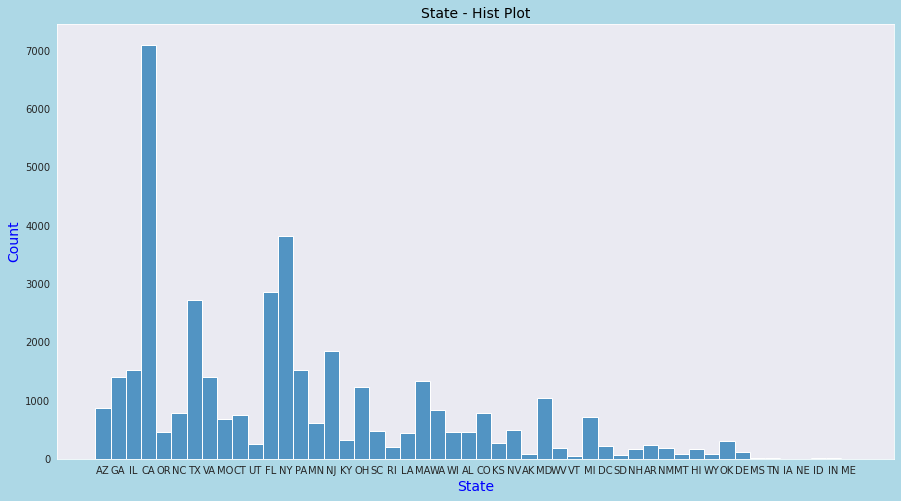

In [615]:
# shows the state with maximum # of loan applications
plt.figure(figsize=(15,8),facecolor='lightblue')
hplot = sns.histplot(loan['addr_state'])
# hplot.bar_label(hplot.containers[0])
hplot.set_title('State - Hist Plot',fontsize=14,color='black')
hplot.set_xlabel('State',fontsize=14,color='b')
hplot.set_ylabel('Count',fontsize=14,color='b')
# Inference:
# - State CA has the most number of applications

Univariate Analysis of Annual Income - Quantitative Variable 

In [616]:
loan['annual_inc'].describe()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

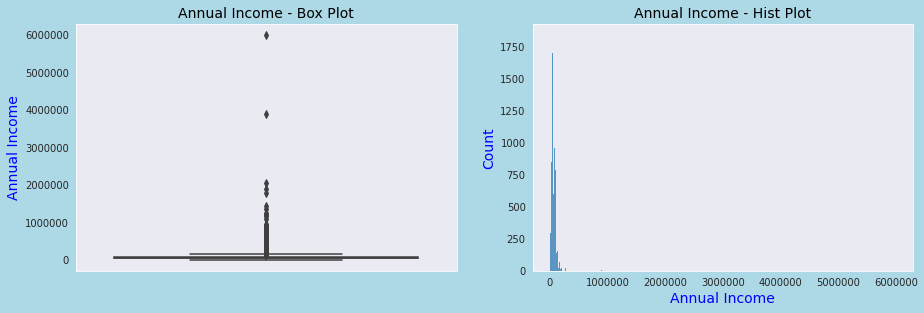

In [617]:
def draw_annual_income_plots():
  plt.figure(figsize=(15,10),facecolor='lightblue')
  plt.subplot(2, 2, 1)
  bplot = sns.boxplot(y=loan['annual_inc'])
  bplot.ticklabel_format(style='plain', axis='y')
  bplot.set_title('Annual Income - Box Plot',fontsize=14,color='black')
  bplot.set_ylabel('Annual Income',fontsize=14,color='b')
  plt.subplot(2, 2, 2)
  hplot = sns.histplot(loan['annual_inc'])
  hplot.ticklabel_format(style='plain', axis='x')
  hplot.set_title('Annual Income - Hist Plot',fontsize=14,color='black')
  hplot.set_xlabel('Annual Income',fontsize=14,color='b')
  hplot.set_ylabel('Count',fontsize=14,color='b')

draw_annual_income_plots()
# inference 
# - distribution of annual income of applicants.
# - there are few outliers

Remove outliers in annual income

In [618]:
loan = loan[loan["annual_inc"] < loan["annual_inc"].quantile(0.99)]
print('after removing outliers')
loan['annual_inc'].describe()

after removing outliers


count     39319.000000
mean      65524.215803
std       35215.885297
min        4000.000000
25%       40000.000000
50%       58000.000000
75%       81000.000000
max      234996.000000
Name: annual_inc, dtype: float64

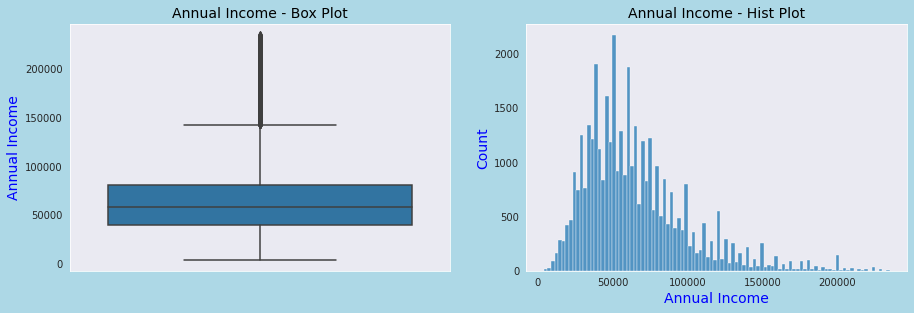

In [619]:
draw_annual_income_plots()
# inference
# - outliers are removed, which helps with data distribution. 
# - median is 58000

Univariate Analysis on chargeoff_within_12_mths and collection_recovery_fee - Quantitative Variables

Text(0.5, 0, 'Collection Recovery Fee')

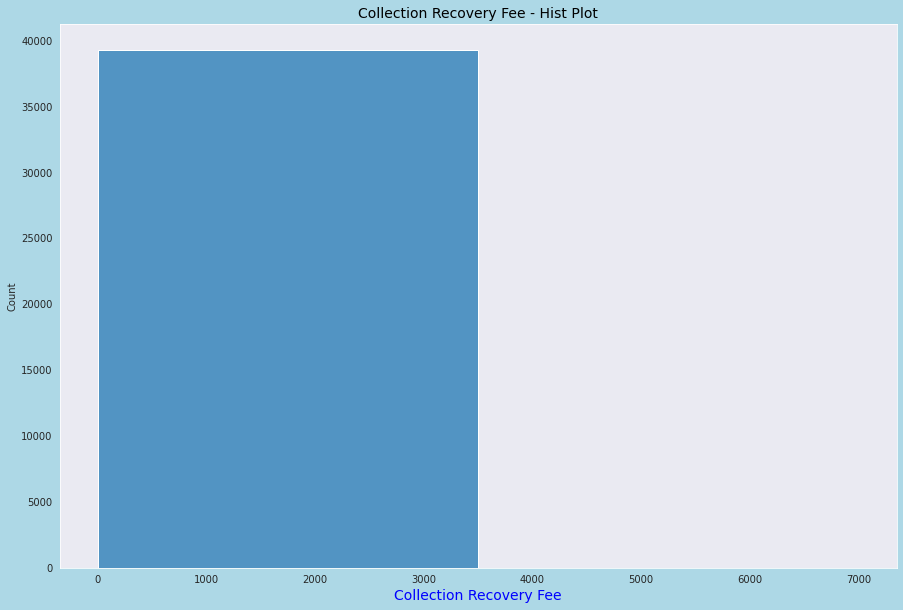

In [620]:
loan['chargeoff_within_12_mths'].unique()
# has only zeroes-> add 'chargeoff_within_12_mths' to list of columns to be removed
columns_list_remove.add('chargeoff_within_12_mths')
# loan['collection_recovery_fee'].unique()
plt.figure(figsize=(15,10),facecolor='lightblue')
plt.ticklabel_format(style='plain', axis='x')
hplot = sns.histplot(loan['collection_recovery_fee'],bins=2)
hplot.set_title('Collection Recovery Fee - Hist Plot',fontsize=14,color='black')
hplot.set_xlabel('Collection Recovery Fee',fontsize=14,color='b')
# inference -> most collection recovery fee is under 3500

Univariate analysis on collections_12_mths_ex_med and delinq_2yrs - Quantitative Variables

delinq_2yrs: The past-due amount owed for the accounts on which the borrower is now delinquent.

Text(0.5, 0, 'Delinq 2 years')

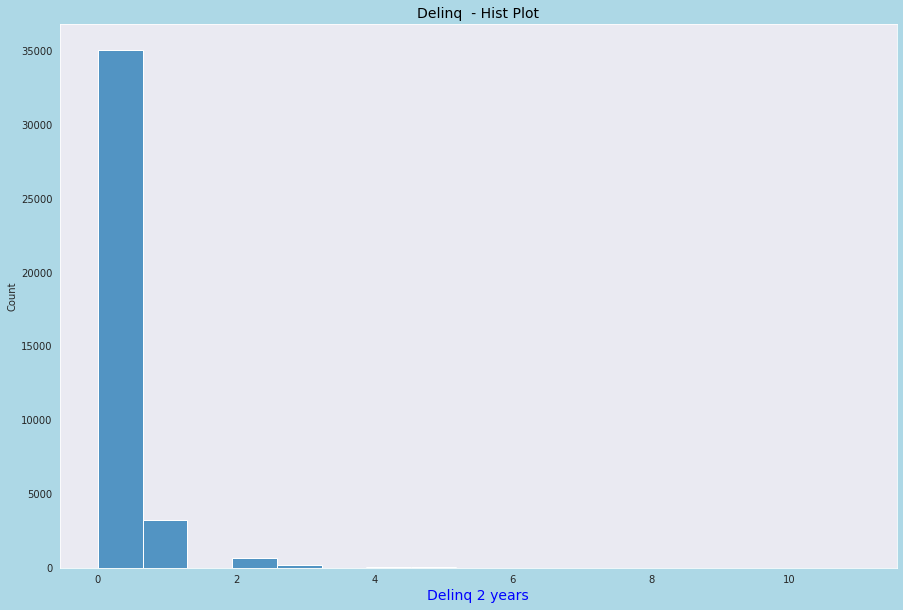

In [621]:
loan['collections_12_mths_ex_med'].unique()
# has only zeroes-> add 'collections_12_mths_ex_med' to list of columns to be removed
columns_list_remove.add('collections_12_mths_ex_med')

plt.figure(figsize=(15,10),facecolor='lightblue')
hplot = sns.histplot(loan['delinq_2yrs'])
# hplot.bar_label(hplot.containers[0])
hplot.set_title('Delinq  - Hist Plot',fontsize=14,color='black')
hplot.set_xlabel('Delinq 2 years',fontsize=14,color='b')
# Inference
# - atleast 35000 applications have deliquent borrowers

Univariate Analysis on delinq_amnt and dti - Quantitative Variables

dti: A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

Text(0.5, 0, 'DTI')

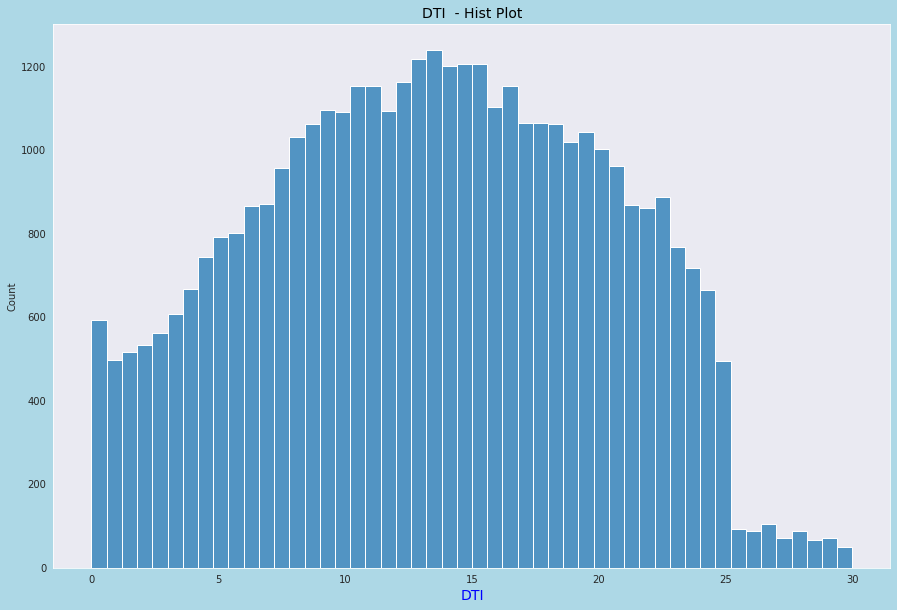

In [622]:
loan['delinq_amnt'].unique()
# has only zeroes-> add 'delinq_amnt' to list of columns to be removed
columns_list_remove.add('delinq_amnt')
plt.figure(figsize=(15,10),facecolor='lightblue')
hplot = sns.histplot(loan['dti'])
hplot.set_title('DTI  - Hist Plot',fontsize=14,color='black')
hplot.set_xlabel('DTI',fontsize=14,color='b')
# Inference 
# - distribution of dti among applications

Univariate analysis on derived column earliest_cr_line_year - Derived Ordered Categorical variable

Text(0.5, 0, 'Year')

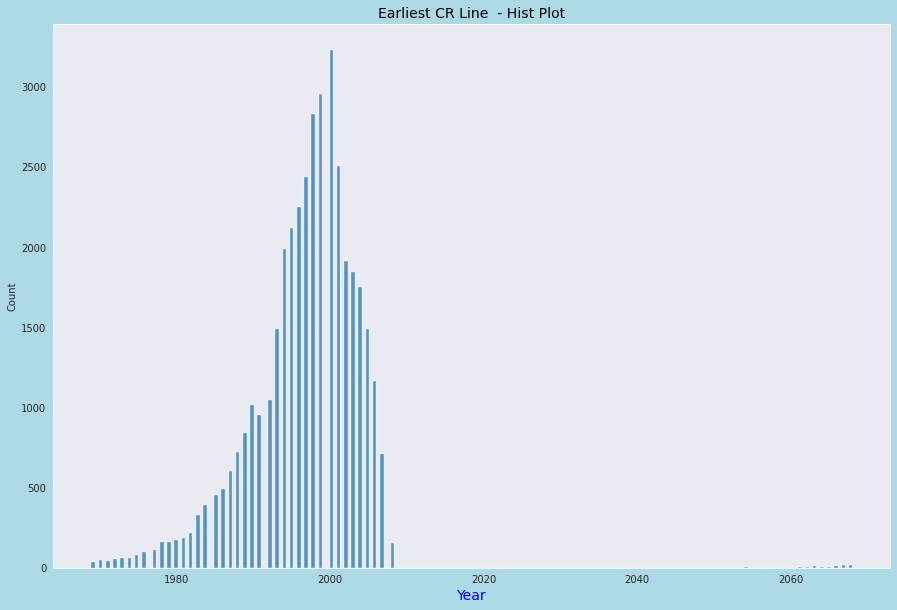

In [623]:
# earliest_cr_line -> The year the borrower's earliest reported credit line was opened
plt.figure(figsize=(15,10),facecolor='lightblue')
hplot = sns.histplot(loan['earliest_cr_line_year'])
hplot.set_title('Earliest CR Line  - Hist Plot',fontsize=14,color='black')
hplot.set_xlabel('Year',fontsize=14,color='b')
# inference
# - most credit lines were opened in 2000

Univariate Analysis on Emp Length - Ordered Categorical Variable

Text(0.5, 0, 'Years')

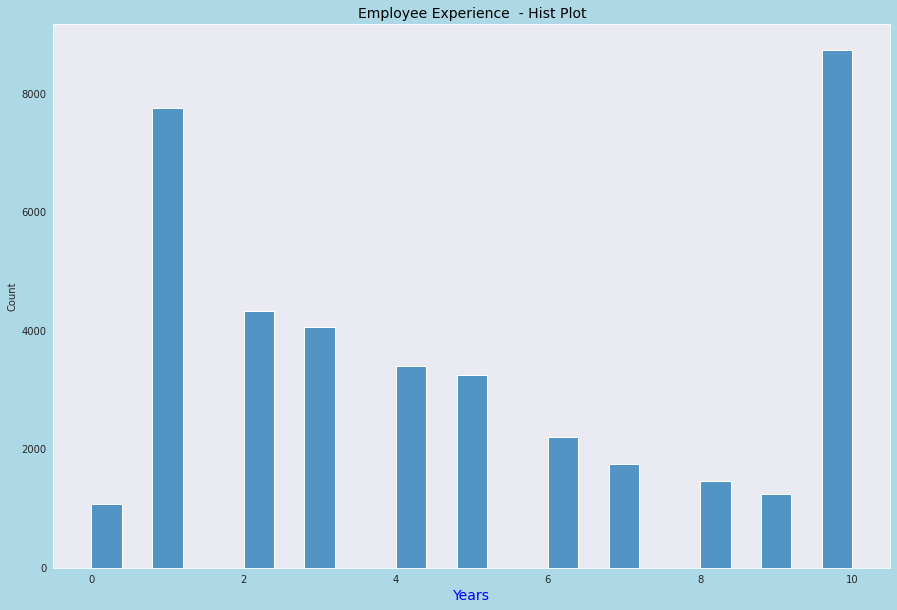

In [624]:
plt.figure(figsize=(15,10),facecolor='lightblue')
hplot = sns.histplot(loan['emp_length'])
# hplot.bar_label(hplot.containers[0])
hplot.set_title('Employee Experience  - Hist Plot',fontsize=14,color='black')
hplot.set_xlabel('Years',fontsize=14,color='b')
# inference 
# - most loan applications have applicants with more than 10 years of work experience

Univariate analysis on Funded Amount - Quantitative Variable

In [625]:
# funded_amnt
print(loan['funded_amnt'].describe())


count    39319.000000
mean     10865.956662
std       7108.680268
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64


Text(0.5, 0, 'Funded Amount')

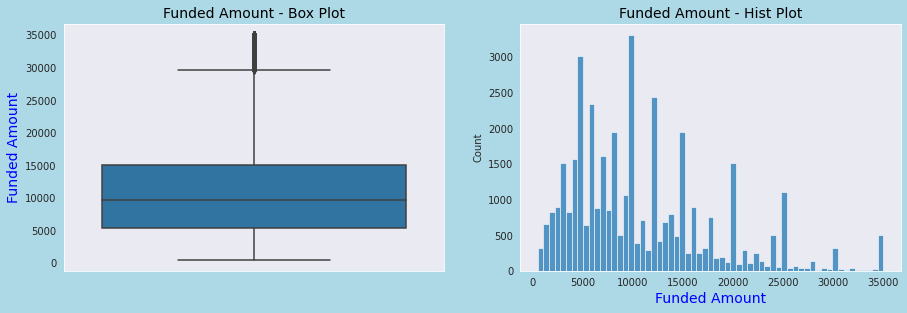

In [626]:
plt.figure(figsize=(15,10),facecolor='lightblue')
plt.subplot(2, 2, 1)
bplot = sns.boxplot(y=loan['funded_amnt'])
bplot.ticklabel_format(style='plain', axis='y')
bplot.set_title('Funded Amount - Box Plot',fontsize=14,color='black')
bplot.set_ylabel('Funded Amount',fontsize=14,color='b')
plt.subplot(2, 2, 2)
hplot = sns.histplot(loan['funded_amnt'])
hplot.ticklabel_format(style='plain', axis='x')
hplot.set_title('Funded Amount - Hist Plot',fontsize=14,color='black')
hplot.set_xlabel('Funded Amount',fontsize=14,color='b')


# Inference 
# - distribution of funded amount
# - median value is 9600
# - most applications have 11000

Univariate Analysis on Funded Amount Invested - Quantitative Variable

In [627]:
# funded_amnt_inv
print(loan['funded_amnt_inv'].describe())

count    39319.000000
mean     10320.302968
std       7049.759305
min          0.000000
25%       5000.000000
50%       8900.000000
75%      14270.949420
max      35000.000000
Name: funded_amnt_inv, dtype: float64


Text(0.5, 0, 'Funded Amount Invested')

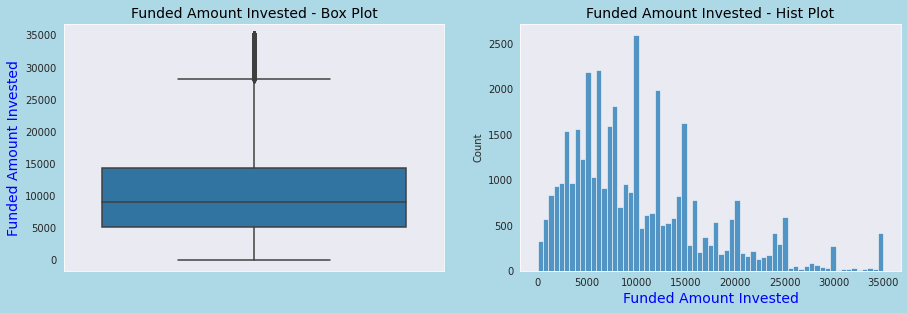

In [628]:
plt.figure(figsize=(15,10),facecolor='lightblue')
plt.subplot(2, 2, 1)
bplot = sns.boxplot(y=loan['funded_amnt_inv'])
bplot.ticklabel_format(style='plain', axis='y')
bplot.set_title('Funded Amount Invested - Box Plot',fontsize=14,color='black')
bplot.set_ylabel('Funded Amount Invested',fontsize=14,color='b')
plt.subplot(2, 2, 2)
hplot = sns.histplot(loan['funded_amnt_inv'])
hplot.ticklabel_format(style='plain', axis='x')
hplot.set_title('Funded Amount Invested - Hist Plot',fontsize=14,color='black')
hplot.set_xlabel('Funded Amount Invested',fontsize=14,color='b')

# Inference 
# - distribution of funded amount Invested
# - median value is 8975
# - there are outliers

Univariate analysis on Grade - Ordered Categorical Variable

Text(0.5, 0, 'Loan Grade')

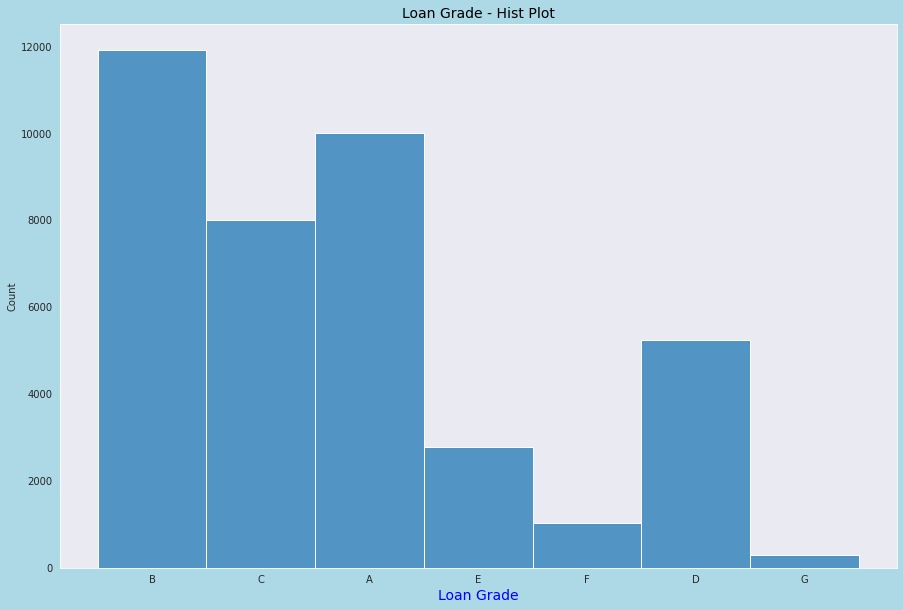

In [629]:
# grade -> LC assigned loan grade
plt.figure(figsize=(15,10),facecolor='lightblue')
hplot = sns.histplot(loan['grade'])
hplot.set_title('Loan Grade - Hist Plot',fontsize=14,color='black')
hplot.set_xlabel('Loan Grade',fontsize=14,color='b')
# hplot.bar_label(hplot.containers[0])

# Inference
# - most number of applications have B grade

Univariate analysis on home_ownership - Categorical Variable

Text(0.5, 0, 'Home Ownership')

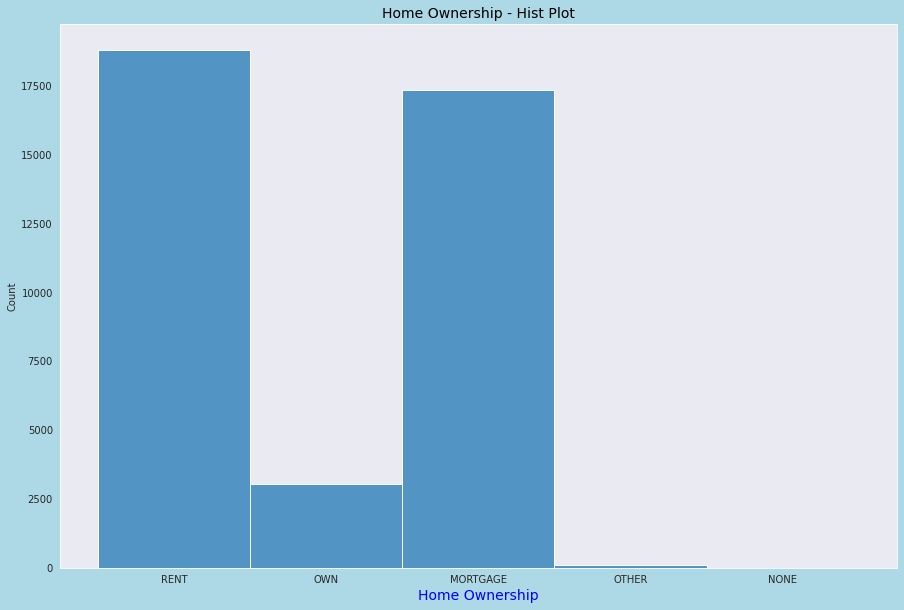

In [630]:
plt.figure(figsize=(15,10),facecolor='lightblue')
hplot = sns.histplot(loan['home_ownership'])
# hplot.bar_label(hplot.containers[0])
hplot.set_title('Home Ownership - Hist Plot',fontsize=14,color='black')
hplot.set_xlabel('Home Ownership',fontsize=14,color='b')

# Inference
# - most number of applications have rented house

Univariate analysis on Int Rate - Quantitative variable

In [631]:
print(loan['int_rate'].describe())

count    39319.000000
mean        12.006142
std          3.717367
min          5.420000
25%          9.250000
50%         11.830000
75%         14.540000
max         24.590000
Name: int_rate, dtype: float64


Text(0.5, 0, 'Interest Rate')

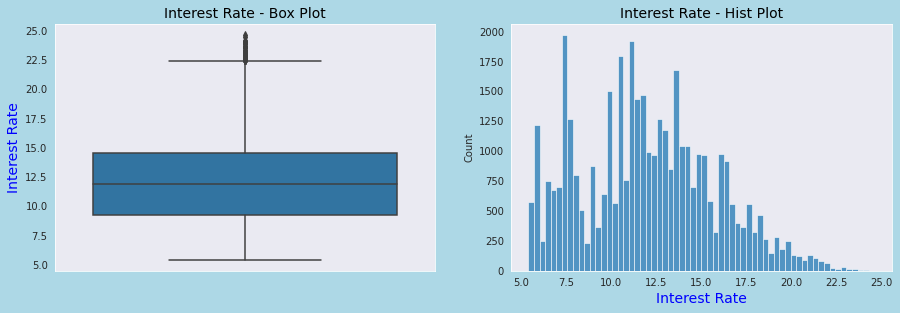

In [632]:
plt.figure(figsize=(15,10),facecolor='lightblue')
plt.subplot(2, 2, 1)
bplot = sns.boxplot(y=loan['int_rate'])
bplot.ticklabel_format(style='plain', axis='y')
bplot.set_title('Interest Rate - Box Plot',fontsize=14,color='black')
bplot.set_ylabel('Interest Rate',fontsize=14,color='b')
plt.subplot(2, 2, 2)
hplot = sns.histplot(loan['int_rate'])
hplot.ticklabel_format(style='plain', axis='x')
hplot.set_title('Interest Rate - Hist Plot',fontsize=14,color='black')
hplot.set_xlabel('Interest Rate',fontsize=14,color='b')
# Inference
# - most number of applications have 7.5 interest rate

Univariate analysis on Loan Amount - Quantitative variable

In [633]:
loan['loan_amnt'].describe()

count    39319.000000
mean     11134.114550
std       7376.086312
min        500.000000
25%       5400.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

Text(0.5, 0, 'Loan Amount')

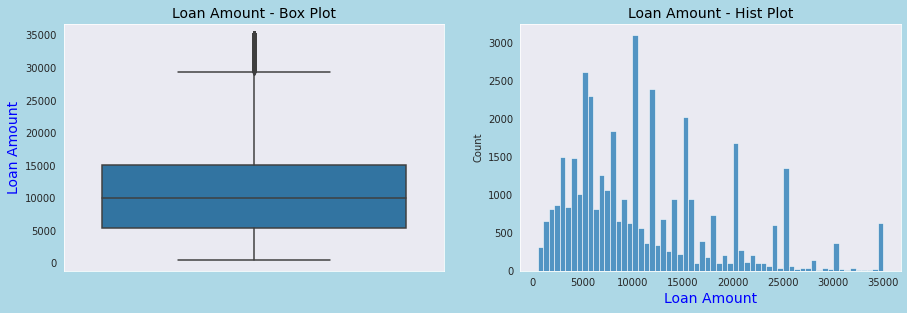

In [634]:
plt.figure(figsize=(15,10),facecolor='lightblue')
plt.subplot(2, 2, 1)
bplot = sns.boxplot(y=loan['loan_amnt'])
bplot.ticklabel_format(style='plain', axis='y')
bplot.set_title('Loan Amount - Box Plot',fontsize=14,color='black')
bplot.set_ylabel('Loan Amount',fontsize=14,color='b')
plt.subplot(2, 2, 2)
hplot = sns.histplot(loan['loan_amnt'])
hplot.ticklabel_format(style='plain', axis='x')
hplot.set_title('Loan Amount - Hist Plot',fontsize=14,color='black')
hplot.set_xlabel('Loan Amount',fontsize=14,color='b')

# Inference 
# - distribution of loan amount
# - median value is 10000
# - Most applications have requested for 11000

Univariate analysis on Loan Status - Ordered Categorical variable

Text(0.5, 0, 'Loan Status')

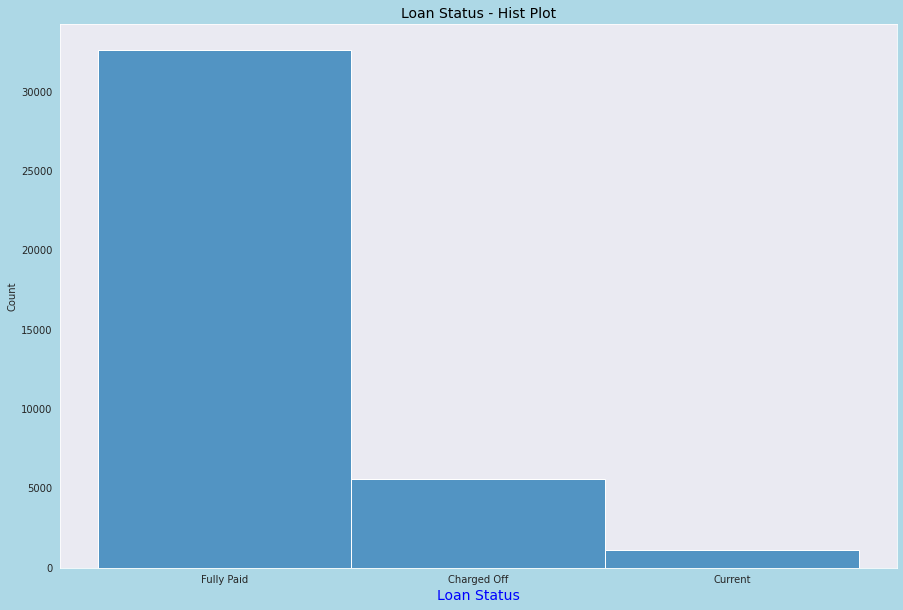

In [635]:
plt.figure(figsize=(15,10),facecolor='lightblue')
hplot = sns.histplot(loan['loan_status'])
hplot.set_title('Loan Status - Hist Plot',fontsize=14,color='black')
hplot.set_xlabel('Loan Status',fontsize=14,color='b')
# hplot.bar_label(hplot.containers[0])

# Inference 
# - Most loans are fully paid
# - Can calculate the % of charged off loans

Univariate Analysis on Public record of Bankruptcies - Quantitative variable

Text(0.5, 0, 'Bankruptcies Count')

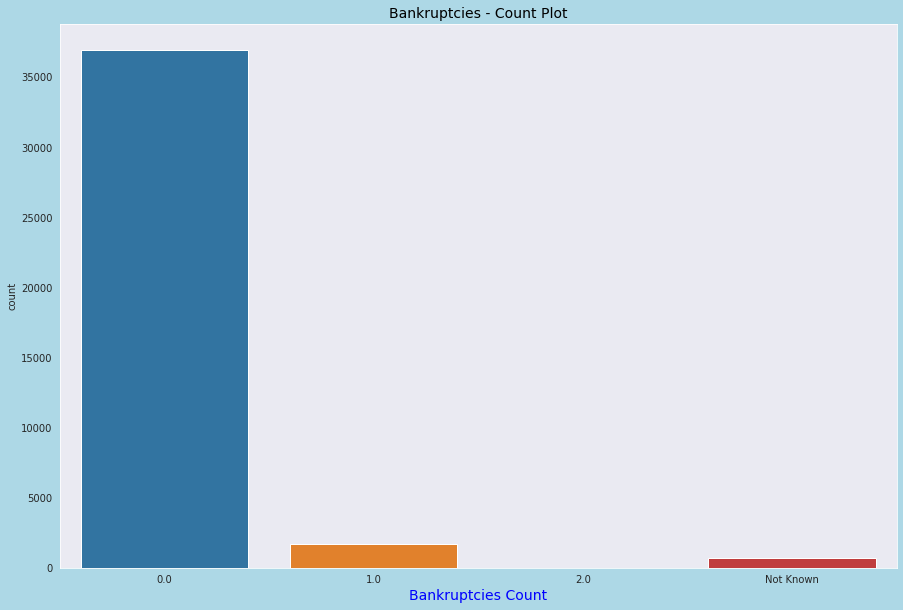

In [636]:
plt.figure(figsize=(15,10),facecolor='lightblue')
hplot = sns.countplot(x=loan['pub_rec_bankruptcies'])
hplot.set_title('Bankruptcies - Count Plot',fontsize=14,color='black')
hplot.set_xlabel('Bankruptcies Count',fontsize=14,color='b')
# hplot.bar_label(hplot.containers[0])

# Inference 
# - Most loan applicants dont have public record of bankruptcy
# - 1674 applications have bankruptcy record.
# - 7 have 2 bankruptcies.

Univariate Analysis on column Purpose - Unordered categorical variable

Text(0.5, 0, 'Purpose')

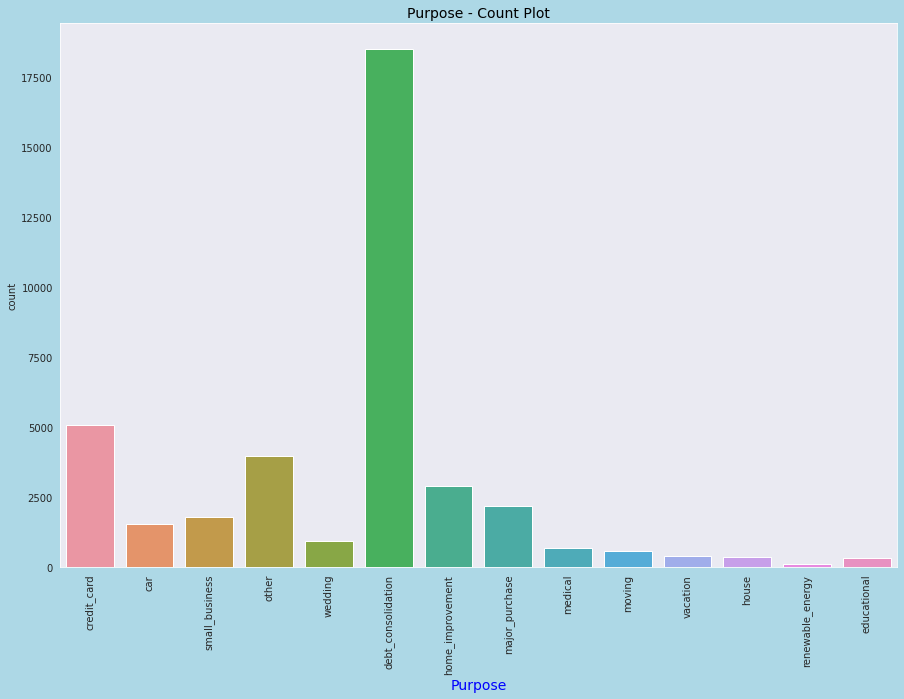

In [637]:
plt.figure(figsize=(15,10),facecolor='lightblue')
plt.xticks(rotation=90)
hplot = sns.countplot(x=loan['purpose'])
# hplot.bar_label(hplot.containers[0])
hplot.set_title('Purpose - Count Plot',fontsize=14,color='black')
hplot.set_xlabel('Purpose',fontsize=14,color='b')

# Inference 
# - Most loan applications are for debt consolidation.

In [638]:
print(columns_list_remove)
# drop columns that doesn't have any useful information.
loan.drop(labels = columns_list_remove, axis =1, inplace=True)
# columns reduced to 48
print(loan.shape)

{'pymnt_plan', 'application_type', 'chargeoff_within_12_mths', 'delinq_amnt', 'collections_12_mths_ex_med'}
(39319, 48)


Segmented Univariate Analysis

 - Mean Loan Amount Invested vs Purpose

Text(0, 0.5, 'Mean Loan Amount Invested')

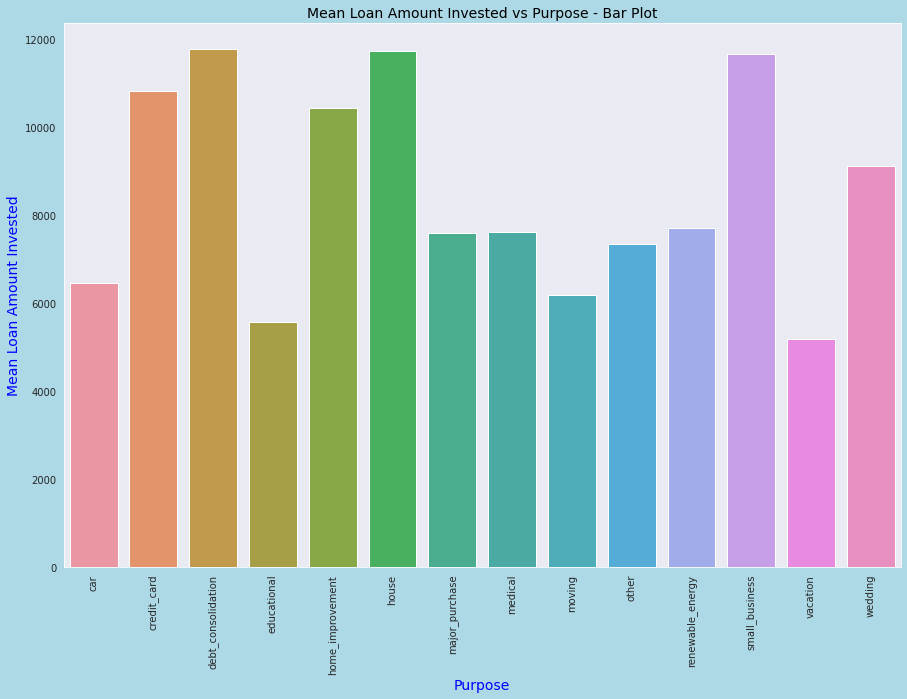

In [639]:
# groupby purpose and find mean
mean_amount_grouped_by_purpose = loan.groupby('purpose')['funded_amnt_inv'].mean()
plt.figure(figsize=(15,10),facecolor='lightblue')
plt.xticks(rotation=90)
hplot = sns.barplot(x= mean_amount_grouped_by_purpose.index, y=mean_amount_grouped_by_purpose.values)
# hplot.bar_label(hplot.containers[0])
hplot.set_title('Mean Loan Amount Invested vs Purpose - Bar Plot',fontsize=14,color='black')
hplot.set_xlabel('Purpose',fontsize=14,color='b')
hplot.set_ylabel('Mean Loan Amount Invested',fontsize=14,color='b')

# inference
# - Mean amount is high for house, debt_consolidation and small_business

- Median Loan Amount Invested vs Grade

Text(0, 0.5, 'Median Loan Amount Invested')

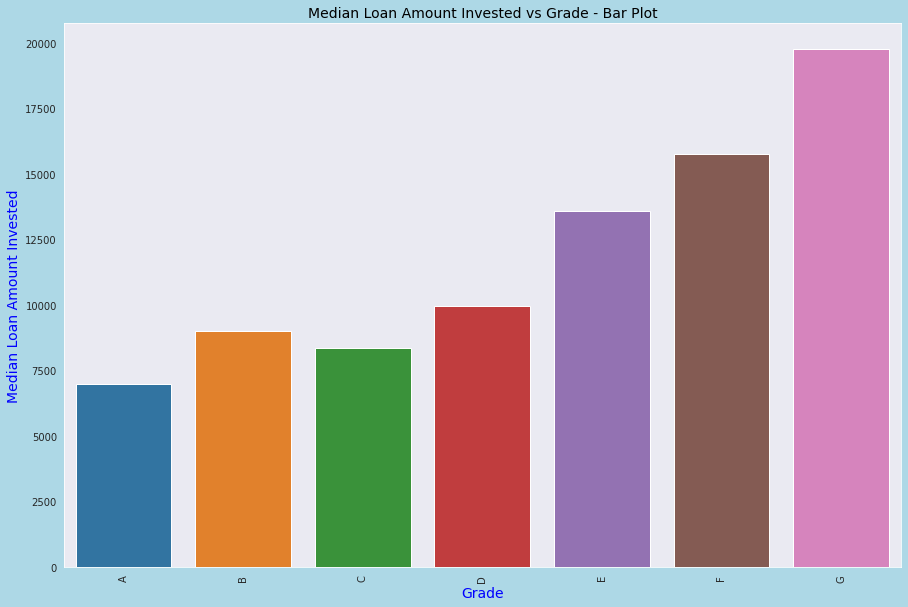

In [640]:
# groupby grade and find median
median_amount_grouped_by_grade = loan.groupby('grade')['funded_amnt_inv'].median()
plt.figure(figsize=(15,10),facecolor='lightblue')
plt.xticks(rotation=90)
hplot = sns.barplot(x= median_amount_grouped_by_grade.index, y=median_amount_grouped_by_grade.values)
# hplot.bar_label(hplot.containers[0])
hplot.set_title('Median Loan Amount Invested vs Grade - Bar Plot',fontsize=14,color='black')
hplot.set_xlabel('Grade',fontsize=14,color='b')
hplot.set_ylabel('Median Loan Amount Invested',fontsize=14,color='b')
# Inference
# - Median amount is high for Grade G loans.
# - Considering Grade G is poor quality loans, the lending club is risking by investing a higher amount of money in risky loans.

- Median Loan amount invested vs Home ownership

Text(0, 0.5, 'Median Loan Amount Invested')

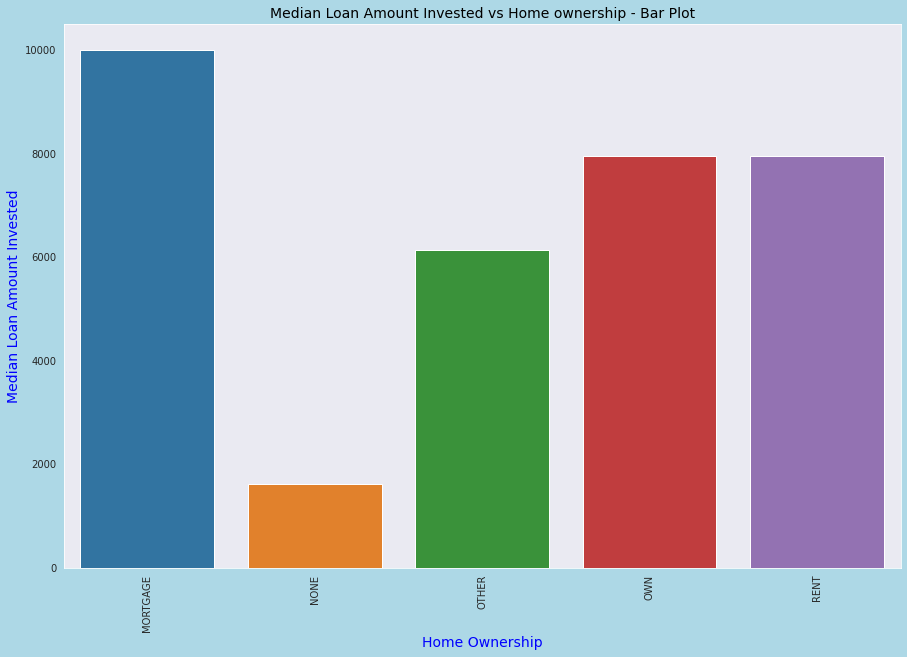

In [641]:
# groupby home ownership and find median
median_amount_grouped_by_home = loan.groupby('home_ownership')['funded_amnt_inv'].median()
plt.figure(figsize=(15,10),facecolor='lightblue')
plt.xticks(rotation=90)
hplot = sns.barplot(x= median_amount_grouped_by_home.index, y=median_amount_grouped_by_home.values)
# hplot.bar_label(hplot.containers[0])
hplot.set_title('Median Loan Amount Invested vs Home ownership - Bar Plot',fontsize=14,color='black')
hplot.set_xlabel('Home Ownership',fontsize=14,color='b')
hplot.set_ylabel('Median Loan Amount Invested',fontsize=14,color='b')
# Inference
# - Median amount is high for applicants with Mortgaged loans

**Bivariate Analysis** 

Loan Amount vs Funded Amount Invested

Funded Amount vs Funded Amount Invested

Text(0, 0.5, 'Amount Invested')

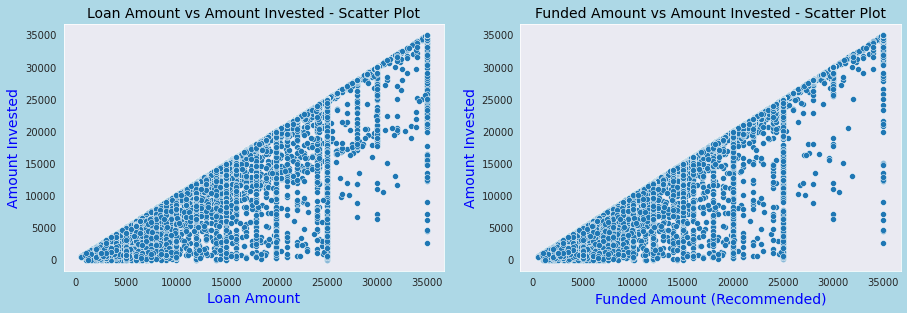

In [642]:
plt.figure(figsize=(15,10),facecolor='lightblue')
plt.subplot(2, 2, 1)
hplot = sns.scatterplot(x=loan['loan_amnt'],y=loan['funded_amnt_inv'])
hplot.set_title('Loan Amount vs Amount Invested - Scatter Plot',fontsize=14,color='black')
hplot.set_xlabel('Loan Amount',fontsize=14,color='b')
hplot.set_ylabel('Amount Invested',fontsize=14,color='b')
plt.subplot(2, 2, 2)
hplot = sns.scatterplot(x=loan['funded_amnt'],y=loan['funded_amnt_inv'])
hplot.set_title('Funded Amount vs Amount Invested - Scatter Plot',fontsize=14,color='black')
hplot.set_xlabel('Funded Amount (Recommended)',fontsize=14,color='b')
hplot.set_ylabel('Amount Invested',fontsize=14,color='b')

# Inference
# - Amount invested is less than or equal to loan amount requested, never greater.
# - Not always guaranteed to get the requested loan amount.
# - Amount invested is less than or equal to Funded amount recommended by lending club, never greater.
# - Not always guaranteed to get the recommended loan amount by lending club.

Term vs Int Rate

Text(0, 0.5, 'Interest Rate')

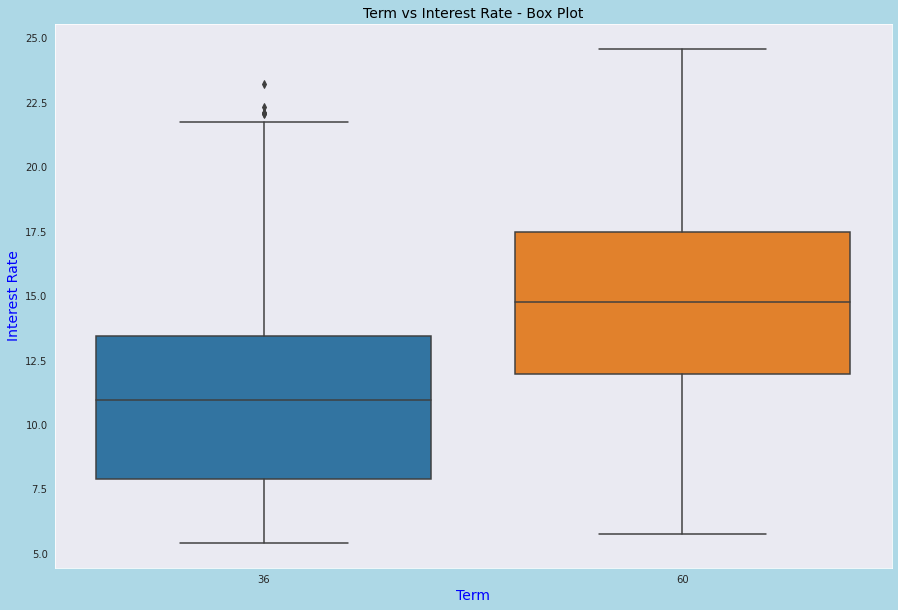

In [643]:
plt.figure(figsize=(15,10),facecolor='lightblue')

hplot = sns.boxplot(x=loan['term'],y=loan['int_rate'])
hplot.set_title('Term vs Interest Rate - Box Plot',fontsize=14,color='black')
hplot.set_xlabel('Term',fontsize=14,color='b')
hplot.set_ylabel('Interest Rate',fontsize=14,color='b')

# Inference
# - Interest rate is higher if the term is longer.

Purpose vs Int Rate

Text(0, 0.5, 'Interest Rate')

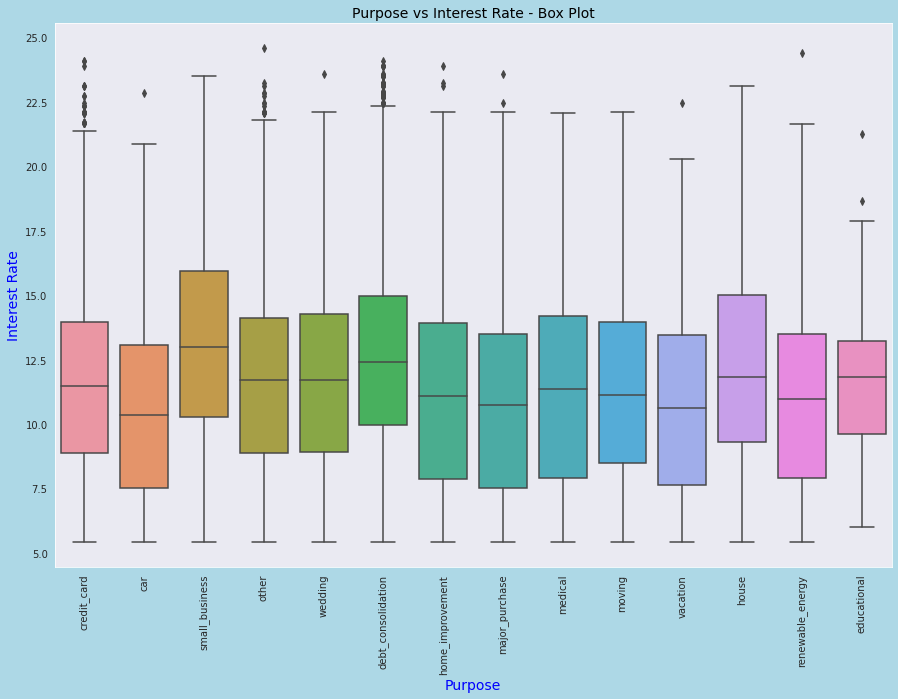

In [644]:
plt.figure(figsize=(15,10),facecolor='lightblue')
plt.xticks(rotation=90)
hplot = sns.boxplot(x=loan['purpose'],y=loan['int_rate'])
hplot.set_title('Purpose vs Interest Rate - Box Plot',fontsize=14,color='black')
hplot.set_xlabel('Purpose',fontsize=14,color='b')
hplot.set_ylabel('Interest Rate',fontsize=14,color='b')

# Inference
# - Interest rate is higher for small business and debt_consolidation.

State vs Loan Status

In [645]:
# Group by status and count the loan per status
# convert it to a dataframe to plot
plt.figure(figsize=(15,10),facecolor='lightblue')
state_groupedby_status = loan.groupby('addr_state').apply(lambda x: x['loan_status'].value_counts())
state_groupedby_status = state_groupedby_status.to_frame('state_groupedby_status').reset_index()
state_groupedby_status = state_groupedby_status.rename(columns={"addr_state":"State","state_groupedby_status": "Count", "level_1": "Status"})
state_groupedby_status

,State,Status,Count
0,AK,Fully Paid,63
1,AK,Charged Off,14
2,AK,Current,2
3,AL,Fully Paid,378
4,AL,Charged Off,54
...,...,...,...
135,WV,Charged Off,21
136,WV,Current,5
137,WY,Fully Paid,76
138,WY,Charged Off,4


<Figure size 1080x720 with 0 Axes>

Text(0, 0.5, 'Count')

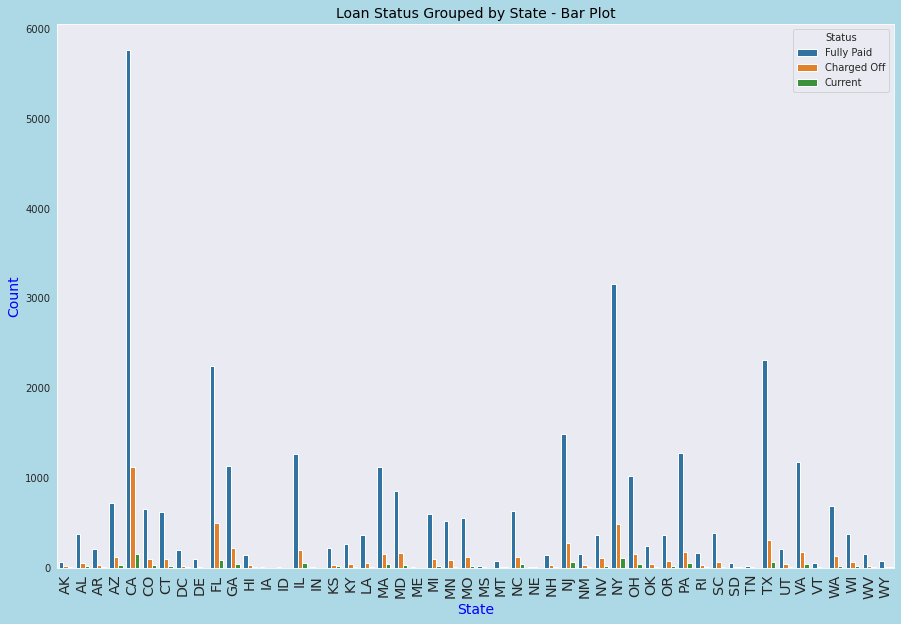

In [646]:
plt.figure(figsize=(15,10),facecolor='lightblue')
hplot = sns.barplot(data = state_groupedby_status, x = "State",y="Count",hue='Status')
hplot.set_xticklabels(
    hplot.get_xticklabels(), 
    rotation=90, 
    horizontalalignment='center',
    fontweight='light',
    fontsize='x-large'

)
# hplot.bar_label(hplot.containers[0])
hplot.set_title('Loan Status Grouped by State - Bar Plot',fontsize=14,color='black')
hplot.set_xlabel('State',fontsize=14,color='b')
hplot.set_ylabel('Count',fontsize=14,color='b')

# Inferences
# - CA has the highest number of loans in each different statuses

Grade vs Int Rate

Text(0, 0.5, 'Interest Rate')

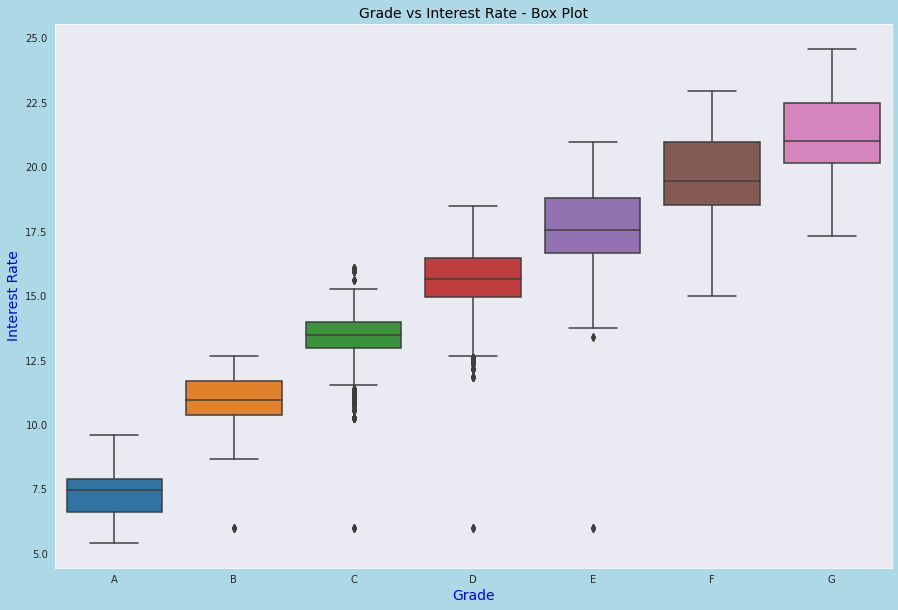

In [647]:
plt.figure(figsize=(15,10),facecolor='lightblue')
hplot = sns.boxplot(x=loan['grade'],y=loan['int_rate'],order = 'ABCDEFG')
hplot.set_title('Grade vs Interest Rate - Box Plot',fontsize=14,color='black')
hplot.set_xlabel('Grade',fontsize=14,color='b')
hplot.set_ylabel('Interest Rate',fontsize=14,color='b')

# inference
# - Grade A is the best to get a loan with lower interst rate
# - Grade G is the worst.

Interest Rate vs Year

Text(0, 0.5, 'Interest Rate')

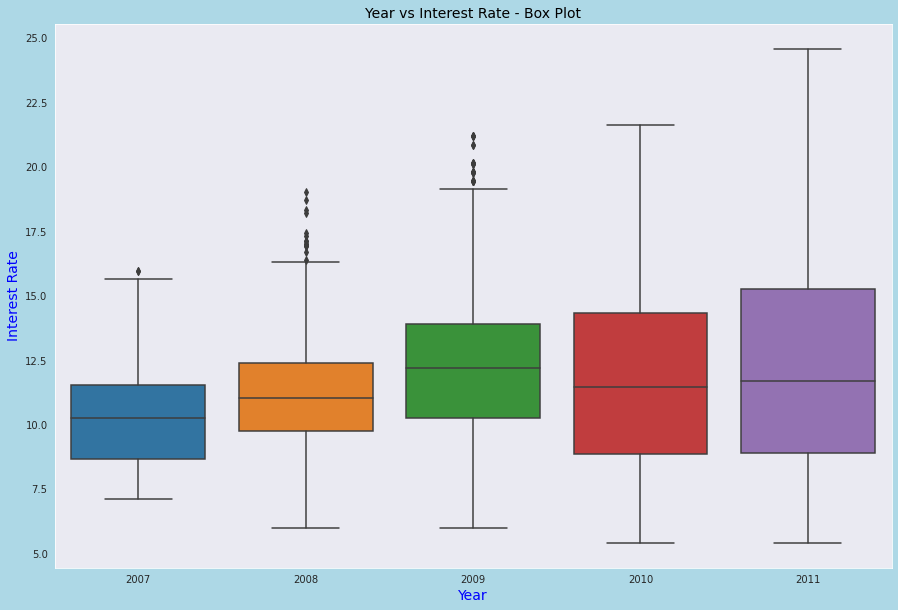

In [648]:
plt.figure(figsize=(15,10),facecolor='lightblue')
hplot = sns.boxplot(x=loan['issue_d_year'],y=loan['int_rate'])
hplot.set_title('Year vs Interest Rate - Box Plot',fontsize=14,color='black')
hplot.set_xlabel('Year',fontsize=14,color='b')
hplot.set_ylabel('Interest Rate',fontsize=14,color='b')

# Inference
# - Interest rate increases with the year.
# - The median value of 2010 and 2011 is less than median value of 2009

Number of Derogatory Public records V Proportion of Loan Statuses

In [649]:
# Group by pub_rec,loan_status and count the loans per status
# convert it to a dataframe to plot
def groupby_dimensions_and_count_values(loan_dataframe, dimension1,dimension2):
  """
  function to group loan df by dimension1 and dimension2
  and count values.
  This function also creates a derived column % which is the % of applications per loan statuses grouped by dimensions.
  """
  df = loan_dataframe.groupby([dimension1,dimension2]).apply(lambda x: x['loan_status'].value_counts())
  df = df.to_frame('df').reset_index()
  df = df.rename(columns={"df": "count", "level_2": "status"})
  # derived column to plot percentage of loan applicants per status grouped by dimension1
  df['%']=(df['count']/df.groupby(dimension1)['count'].transform('sum'))*100
  print(df.head(6))
  return df

rec_groupedby_loan_status = groupby_dimensions_and_count_values(loan,'pub_rec','loan_status')


   pub_rec  loan_status       status  count          %
0        0  Charged Off  Charged Off   5120  13.759002
1        0      Current      Current   1080   2.902290
2        0   Fully Paid   Fully Paid  31012  83.338708
3        1  Charged Off  Charged Off    454  22.167969
4        1      Current      Current     43   2.099609
5        1   Fully Paid   Fully Paid   1551  75.732422


Text(0, 0.5, '%')

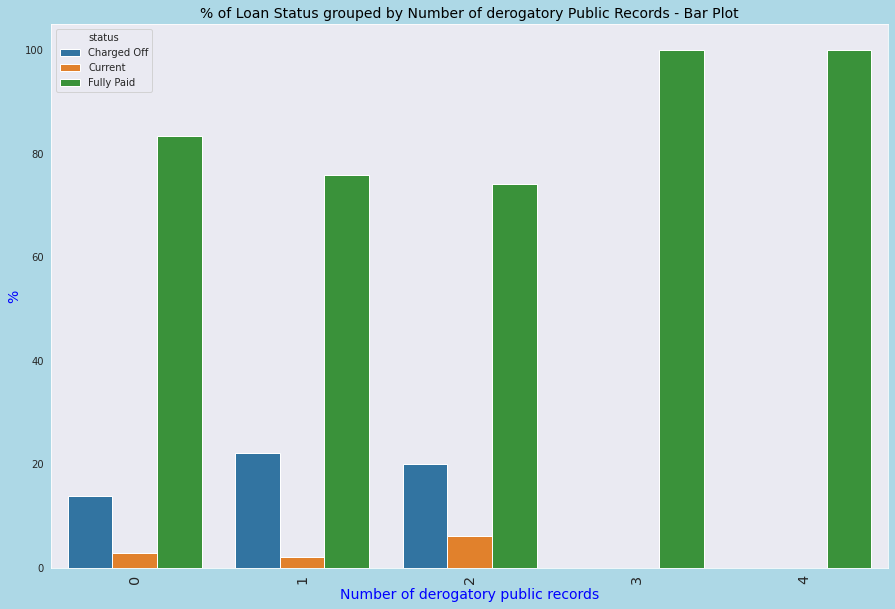

In [650]:
plt.figure(figsize=(15,10),facecolor='lightblue')
hplot = sns.barplot(data = rec_groupedby_loan_status, x = "pub_rec",y="%",hue='status')
hplot.set_xticklabels(
    hplot.get_xticklabels(), 
    rotation=90, 
    horizontalalignment='center',
    fontweight='light',
    fontsize='x-large'

)
# hplot.bar_label(hplot.containers[0])
hplot.set_title('% of Loan Status grouped by Number of derogatory Public Records - Bar Plot',fontsize=14,color='black')
hplot.set_xlabel('Number of derogatory public records',fontsize=14,color='b')
hplot.set_ylabel('%',fontsize=14,color='b')

# Inference
# - No Charged off % for applicants with 3 0r 4 public derogatory records. 
# - Charged off proportion is high for applicants with 1 derogatory record

Number of  public records of bankruptcies Vs Proportion of Loan Statuses

In [651]:
# Group by pub_rec,loan_status and count the loans per status
# convert it to a dataframe to plot
prec_groupedby_loan_status = groupby_dimensions_and_count_values(loan,'pub_rec_bankruptcies','loan_status')


  pub_rec_bankruptcies  loan_status       status  count          %
0                  0.0  Charged Off  Charged Off   5101  13.803648
1                  0.0      Current      Current   1087   2.941495
2                  0.0   Fully Paid   Fully Paid  30766  83.254857
3                  1.0  Charged Off  Charged Off    365  21.856287
4                  1.0      Current      Current     37   2.215569
5                  1.0   Fully Paid   Fully Paid   1268  75.928144


Text(0, 0.5, '%')

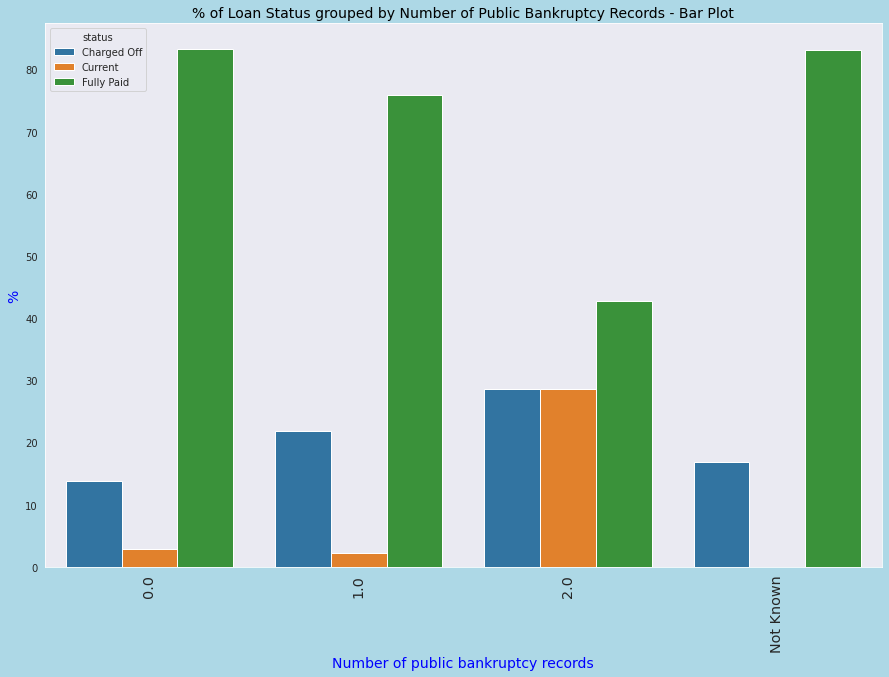

In [652]:
plt.figure(figsize=(15,10),facecolor='lightblue')
hplot = sns.barplot(data = prec_groupedby_loan_status, x = "pub_rec_bankruptcies",y="%",hue='status')
hplot.set_xticklabels(
    hplot.get_xticklabels(), 
    rotation=90, 
    horizontalalignment='center',
    fontweight='light',
    fontsize='x-large'

)
# hplot.bar_label(hplot.containers[0])
hplot.set_title('% of Loan Status grouped by Number of Public Bankruptcy Records - Bar Plot',fontsize=14,color='black')
hplot.set_xlabel('Number of public bankruptcy records',fontsize=14,color='b')
hplot.set_ylabel('%',fontsize=14,color='b')

# Inference
# - Charged off % is high for those with 2.0 public bankruptcy record
# - Those with 0 bankruptcy record have higher fully paid percentage

Purpose Vs Proportion of Loan Statuses

In [653]:
# Group by purpose,loan_status and count the loans per status
# convert it to a dataframe to plot
purpose_groupedby_loan_status = groupby_dimensions_and_count_values(loan,'purpose','loan_status')

       purpose  loan_status       status  count          %
0          car  Charged Off  Charged Off    160  10.376135
1          car      Current      Current     50   3.242542
2          car   Fully Paid   Fully Paid   1332  86.381323
3  credit_card  Charged Off  Charged Off    537  10.552171
4  credit_card      Current      Current    102   2.004323
5  credit_card   Fully Paid   Fully Paid   4450  87.443506


Text(0, 0.5, '%')

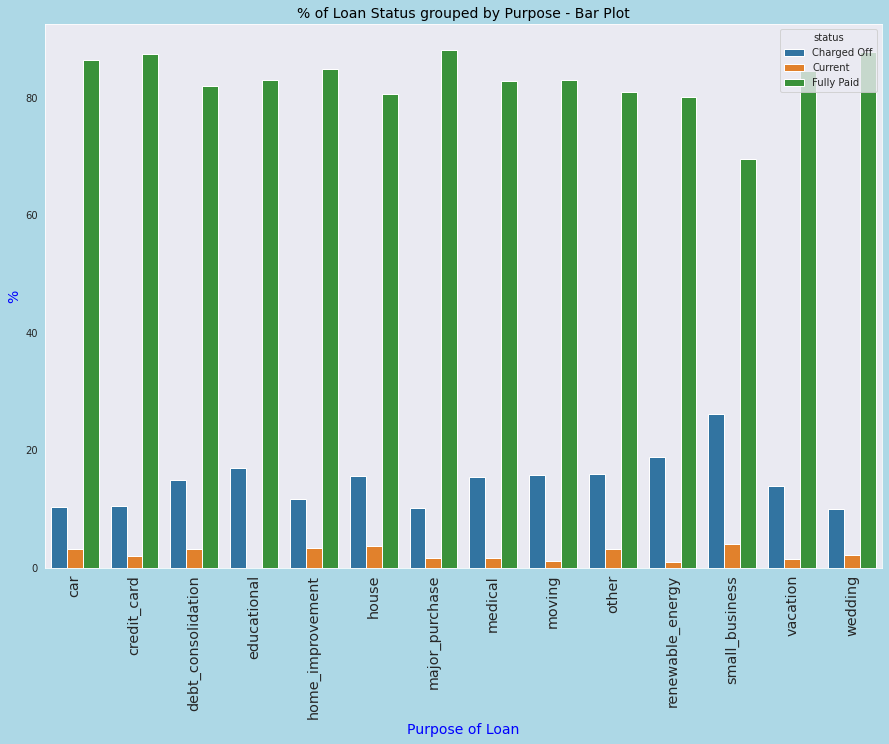

In [654]:
plt.figure(figsize=(15,10),facecolor='lightblue')
hplot = sns.barplot(data = purpose_groupedby_loan_status, x = "purpose",y="%",hue='status')
hplot.set_xticklabels(
    hplot.get_xticklabels(), 
    rotation=90, 
    horizontalalignment='center',
    fontweight='light',
    fontsize='x-large'

)
# hplot.bar_label(hplot.containers[0])
hplot.set_title('% of Loan Status grouped by Purpose - Bar Plot',fontsize=14,color='black')
hplot.set_xlabel('Purpose of Loan',fontsize=14,color='b')
hplot.set_ylabel('%',fontsize=14,color='b')

# Inference
# - Charged off % is higher for small business

Grade vs % of Loan Status

In [655]:
# Group by grade,loan_status and count the loans per status
# convert it to a dataframe to plot
grade_groupedby_loan_status = groupby_dimensions_and_count_values(loan,'grade','loan_status')

  grade  loan_status       status  count          %
0     A  Charged Off  Charged Off    601   5.999201
1     A      Current      Current     40   0.399281
2     A   Fully Paid   Fully Paid   9377  93.601517
3     B  Charged Off  Charged Off   1414  11.857442
4     B      Current      Current    344   2.884696
5     B   Fully Paid   Fully Paid  10167  85.257862


In [ ]:
plt.figure(figsize=(15,10),facecolor='lightblue')
hplot = sns.barplot(data = grade_groupedby_loan_status, x = "grade",y="%",hue='status')
hplot.set_xticklabels(
    hplot.get_xticklabels(), 
    rotation=90, 
    horizontalalignment='center',
    fontweight='light',
    fontsize='x-large'

)
# hplot.bar_label(hplot.containers[0])
hplot.set_title('% of Loan Status grouped by Grade - Bar Plot',fontsize=14,color='black')
hplot.set_xlabel('Grade',fontsize=14,color='b')
hplot.set_ylabel('%',fontsize=14,color='b')

# Inference
# - Charged off % is higher for Grade G
# - Clearly as the Grade moves from A to G, the charged off proportion increases and fully paid proportion decreases.

Text(0, 0.5, '%')

Employment Length vs  % of Loan Status

In [ ]:
# Group by emp_length,loan_status and count the loans per status
# convert it to a dataframe to plot
emp_groupedby_loan_status = groupby_dimensions_and_count_values(loan,'emp_length','loan_status')

In [ ]:
plt.figure(figsize=(15,10),facecolor='lightblue')
hplot = sns.barplot(data = emp_groupedby_loan_status, x = "emp_length",y="%",hue='status')
hplot.set_xticklabels(
    hplot.get_xticklabels(), 
    rotation=90, 
    horizontalalignment='center',
    fontweight='light',
    fontsize='x-large'

)
# hplot.bar_label(hplot.containers[0])
hplot.set_title('% of Loan Status grouped by Work Experience - Bar Plot',fontsize=14,color='black')
hplot.set_xlabel('Work Experience',fontsize=14,color='b')
hplot.set_ylabel('%',fontsize=14,color='b')

# Inference
# - Charged off % is higher for applicants with 0-1 years of experience.
# - Charged off proportion is almost same for 2 -6 years of experience.

Multivariate Analysis

In [ ]:
# create a df with only important columns
loan_copy = loan[['loan_amnt','funded_amnt','funded_amnt_inv','annual_inc', 'issue_d_year','int_rate','loan_status','pub_rec','dti','pub_rec_bankruptcies']].copy()
loan_copy.head(6)

# draw a heat map for correlation matrix
plt.figure(figsize=(15,10),facecolor='lightblue')
hplot = sns.heatmap(loan_copy.corr(),annot=True)
hplot.set_title('Correlation matrix',fontsize=14,color='black')

# inference

# - There is a clear correlation between funded_amnt, loan_amount and loan_amount_inv.
# - There is a correlation between annual income and loan_amount.
# - There is a correlation between int rate and loan_amount.
# - There is negative correlation between number of public derogatory records and loan_amount.
# - There is negative correlation between dti and annual_inc.